In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib as mpl
import cartopy.mpl.geoaxes as geoaxes
from matplotlib_scalebar.scalebar import ScaleBar
from sklearn.metrics.pairwise import haversine_distances

gd_src = '../geodata/{}/{}-c005-s010-vw-pr.geojson'
onemil_src = './node_modules/preprocessing/data/1Mdataset.csv'
nc_src = '../well_data/src_data.csv'
pmouth = './pmouth_topo.json'

In [2]:
def load_gd(level='dis'):
    return gpd.read_file(
        gd_src.format(level, level)
    )

In [3]:
def disp_gd(level):
    gd = load_gd(level)
    ax = gplt.polyplot(
        gd, 
        projection=gcrs.AlbersEqualArea(), 
        edgecolor='blue', 
        linewidth=0.15,
        figsize=(10,10),
    )
    ax.add_artist(ScaleBar(1))

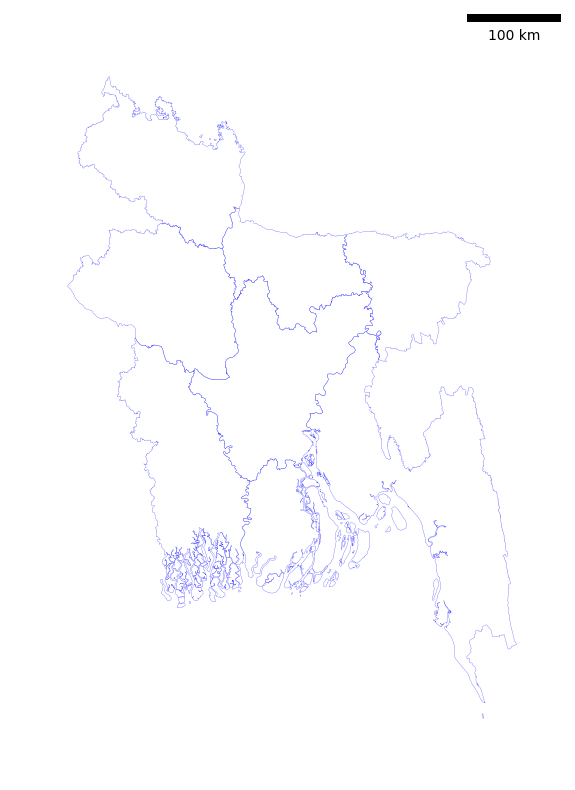

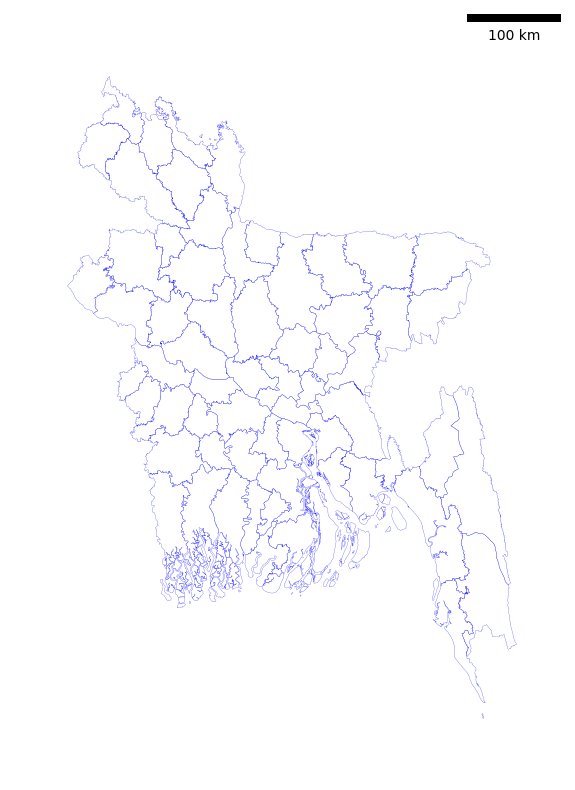

In [4]:
def disp_all_levels():
    for level in ['div', 'dis', 'upa', 'uni', 'mou']:
        disp_gd(level)
        
disp_all_levels()

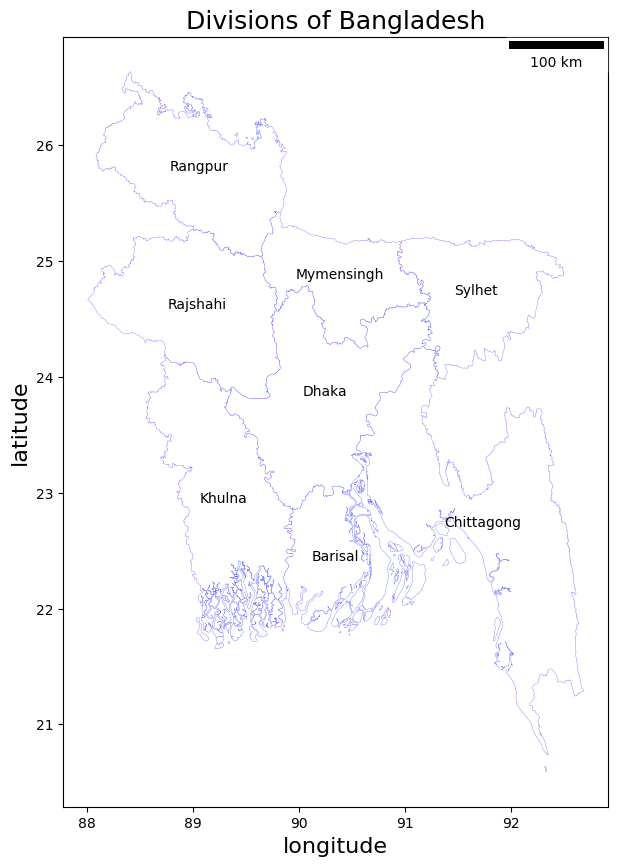

In [5]:
def labelled_div_map():
    # code from https://stackoverflow.com/questions/38899190/geopandas-label-polygons
    gd = load_gd('div')

    ax = gd.plot(
        figsize=(10,10),
        linewidth=0.15,
        edgecolor='blue', 
        facecolor='white',
    )

    gd.apply(
        lambda x: ax.annotate(
            text=x['div'], xy=x.geometry.centroid.coords[0], ha='center'
        ), 
        axis=1
    );
    
    # code from https://stackoverflow.com/questions/70256031/how-do-you-display-the-scale-in-meters-the-north-arrow-and-the-axes-in-latitude
    A=[-88*np.pi/180.,21*np.pi/180.] #Latitude of interest here 40.7 deg, longitude -74.5
    B=[-89*np.pi/180.,21*np.pi/180.] ##Latitude of interest here 40.7 deg, longitude -74.5+1
    dx=(6371000)*haversine_distances([A,B])[0,1]
    ax.add_artist(ScaleBar(dx=dx,units="m")) 
    
    plt.xlabel('longitude', fontsize=16)
    plt.ylabel('latitude', fontsize=16)
    plt.title('Divisions of Bangladesh', fontsize=18)

labelled_div_map()

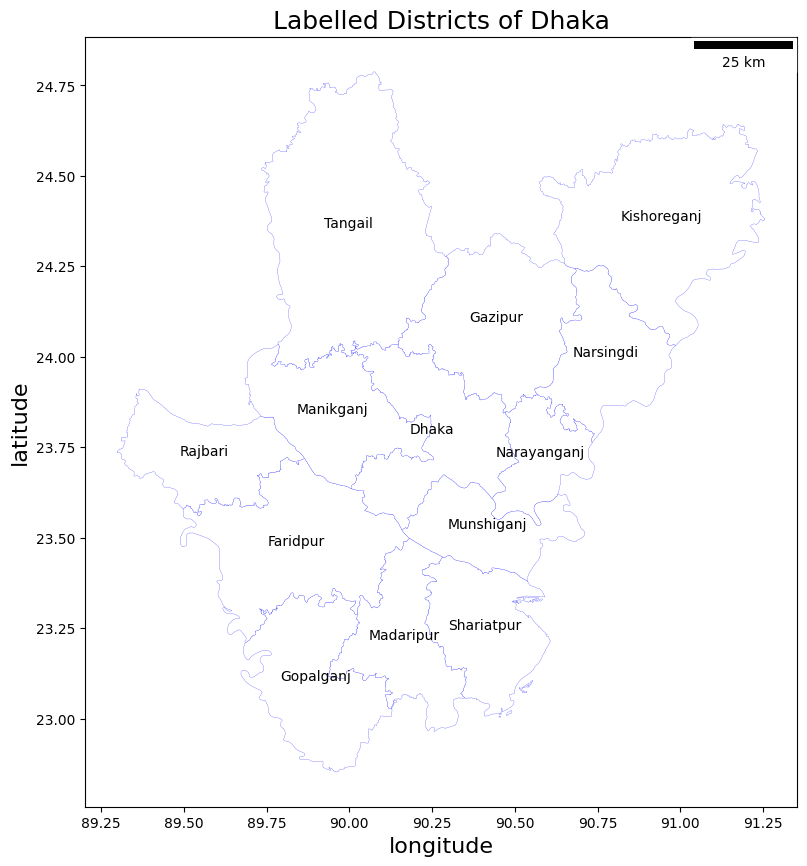

In [6]:
def labelled_dis_dhaka_map():
    gd = load_gd('dis')
    gd = gd[gd['div'] == 'Dhaka']

    ax = gd.plot(
        figsize=(10,10),
        linewidth=0.15,
        edgecolor='blue', 
        facecolor='white',
    )

    gd.apply(
        lambda x: ax.annotate(
            text=x['dis'], xy=x.geometry.centroid.coords[0], ha='center'
        ), 
        axis=1
    );
    
    # code from https://stackoverflow.com/questions/70256031/how-do-you-display-the-scale-in-meters-the-north-arrow-and-the-axes-in-latitude
    A=[89.25*np.pi/180.,23*np.pi/180.] #Latitude of interest here 40.7 deg, longitude -74.5
    B=[90*np.pi/180.,23*np.pi/180.] ##Latitude of interest here 40.7 deg, longitude -74.5+1
    dx=(6371000)*haversine_distances([A,B])[0,1]
    ax.add_artist(ScaleBar(dx=dx,units="m")) 
    
    plt.xlabel('longitude', fontsize=16)
    plt.ylabel('latitude', fontsize=16)
    plt.title('Labelled Districts of Dhaka', fontsize=18)

    
labelled_dis_dhaka_map()

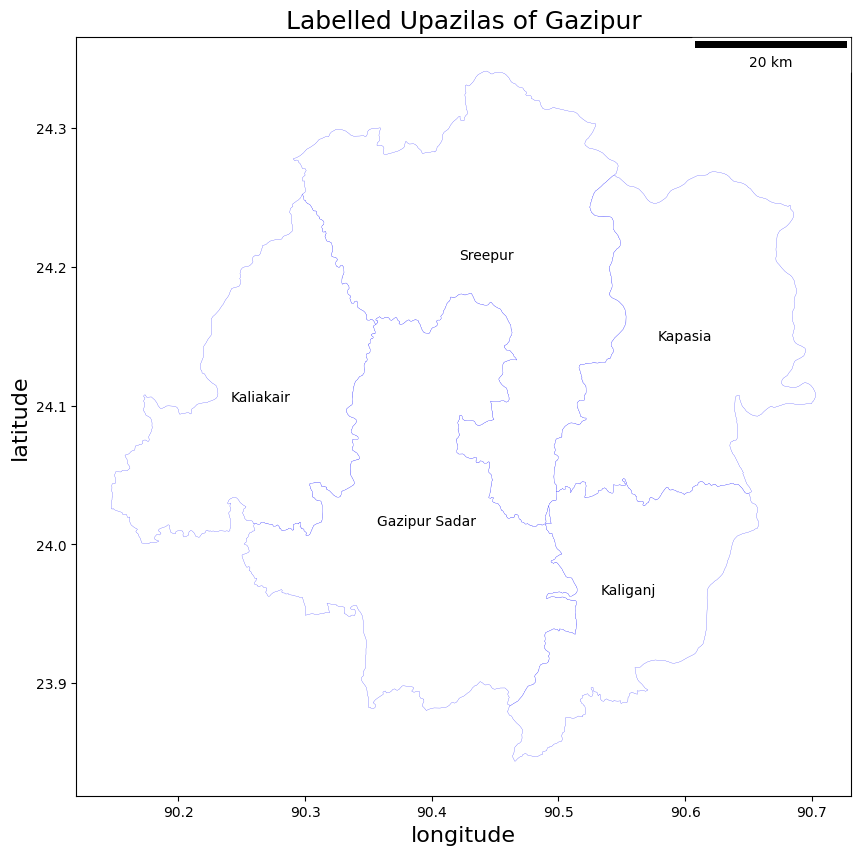

In [7]:
def labelled_upa_gazipur_map():
    gd = load_gd('upa')
    gd = gd[gd['dis'] == 'Gazipur']

    ax = gd.plot(
        figsize=(10,10),
        linewidth=0.15,
        edgecolor='blue', 
        facecolor='white',
    )

    gd.apply(
        lambda x: ax.annotate(
            text=x['upa'], xy=x.geometry.centroid.coords[0], ha='center'
        ), 
        axis=1
    );
    
    # code from https://stackoverflow.com/questions/70256031/how-do-you-display-the-scale-in-meters-the-north-arrow-and-the-axes-in-latitude
    A=[-90.2*np.pi/180.,23.9*np.pi/180.] #Latitude of interest here 40.7 deg, longitude -74.5
    B=[-91.7*np.pi/180.,23.9*np.pi/180.] ##Latitude of interest here 40.7 deg, longitude -74.5+1
    dx=(6371000)*haversine_distances([A,B])[0,1]
    ax.add_artist(ScaleBar(dx=dx,units="m")) 
    
    plt.xlabel('longitude', fontsize=16)
    plt.ylabel('latitude', fontsize=16)
    plt.title('Labelled Upazilas of Gazipur', fontsize=18)

    
labelled_upa_gazipur_map()

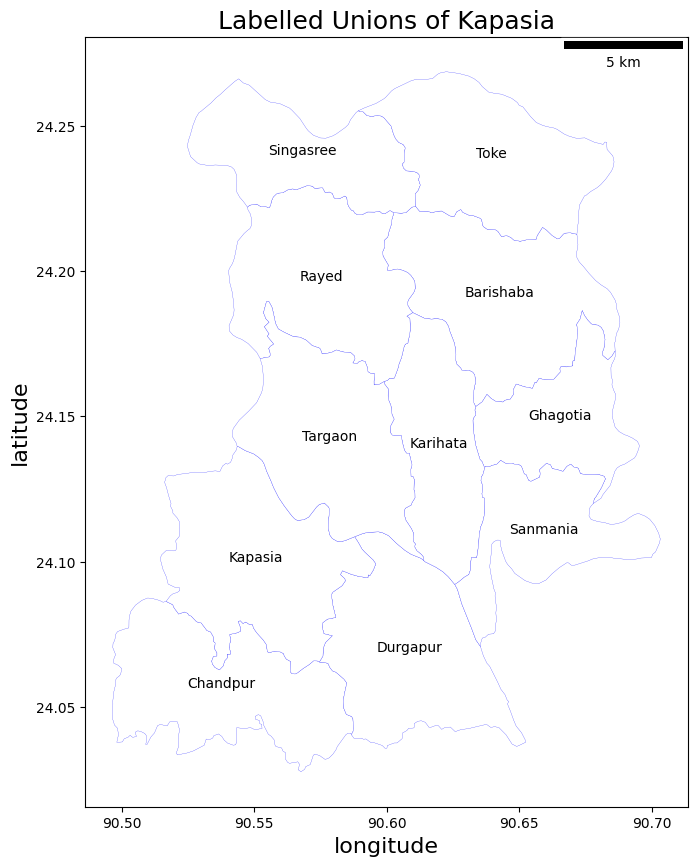

In [8]:
def labelled_upa_gazipur_map():
    gd = load_gd('uni')
    gd = gd[gd['upa'] == 'Kapasia']

    ax = gd.plot(
        figsize=(10,10),
        linewidth=0.15,
        edgecolor='blue', 
        facecolor='white',
    )

    gd.apply(
        lambda x: ax.annotate(
            text=x['uni'], xy=x.geometry.centroid.coords[0], ha='center'
        ), 
        axis=1
    );
    
    # code from https://stackoverflow.com/questions/70256031/how-do-you-display-the-scale-in-meters-the-north-arrow-and-the-axes-in-latitude
    A=[-90.5*np.pi/180.,24.05*np.pi/180.] #Latitude of interest here 40.7 deg, longitude -74.5
    B=[-91.5*np.pi/180.,24.05*np.pi/180.] ##Latitude of interest here 40.7 deg, longitude -74.5+1
    dx=(6371000)*haversine_distances([A,B])[0,1]
    ax.add_artist(ScaleBar(dx=dx,units="m")) 
    
    plt.xlabel('longitude', fontsize=16)
    plt.ylabel('latitude', fontsize=16)
    plt.title('Labelled Unions of Kapasia', fontsize=18)

    
labelled_upa_gazipur_map()

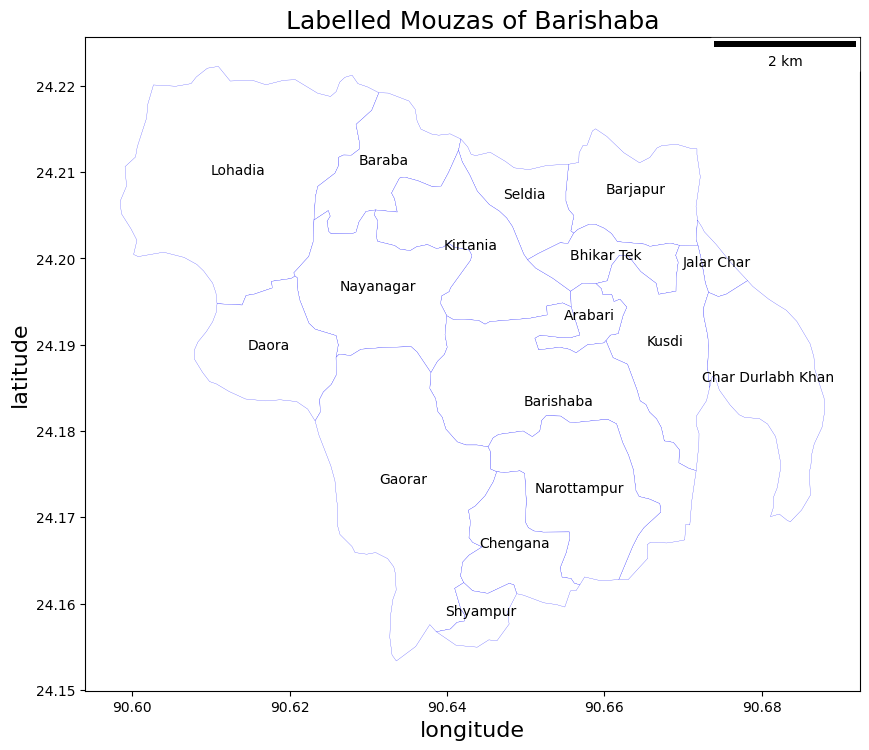

In [9]:
def tem():
    gd = load_gd('mou')
    gd = gd[gd['uni'] == 'Barishaba']

    ax = gd.plot(
        figsize=(10,10),
        linewidth=0.15,
        edgecolor='blue', 
        facecolor='white',
    )

    gd.apply(
        lambda x: ax.annotate(
            text=x['mou'], xy=x.geometry.centroid.coords[0], ha='center'
        ), 
        axis=1
    );
    
    # code from https://stackoverflow.com/questions/70256031/how-do-you-display-the-scale-in-meters-the-north-arrow-and-the-axes-in-latitude
    A=[-90.6*np.pi/180.,24.16*np.pi/180.] #Latitude of interest here 40.7 deg, longitude -74.5
    B=[-91.6*np.pi/180.,24.16*np.pi/180.] ##Latitude of interest here 40.7 deg, longitude -74.5+1
    dx=(6371000)*haversine_distances([A,B])[0,1]
    ax.add_artist(ScaleBar(dx=dx,units="m")) 
    
    plt.xlabel('longitude', fontsize=16)
    plt.ylabel('latitude', fontsize=16)
    plt.title('Labelled Mouzas of Barishaba', fontsize=18)

    
tem()

In [10]:
def load_wells(src=nc_src):
    return pd.read_csv(src)

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 11 entries, 10 to 61
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   area      11 non-null     float64 
 1   dis       11 non-null     object  
 2   div       11 non-null     object  
 3   geometry  11 non-null     geometry
dtypes: float64(1), geometry(1), object(2)
memory usage: 440.0+ bytes


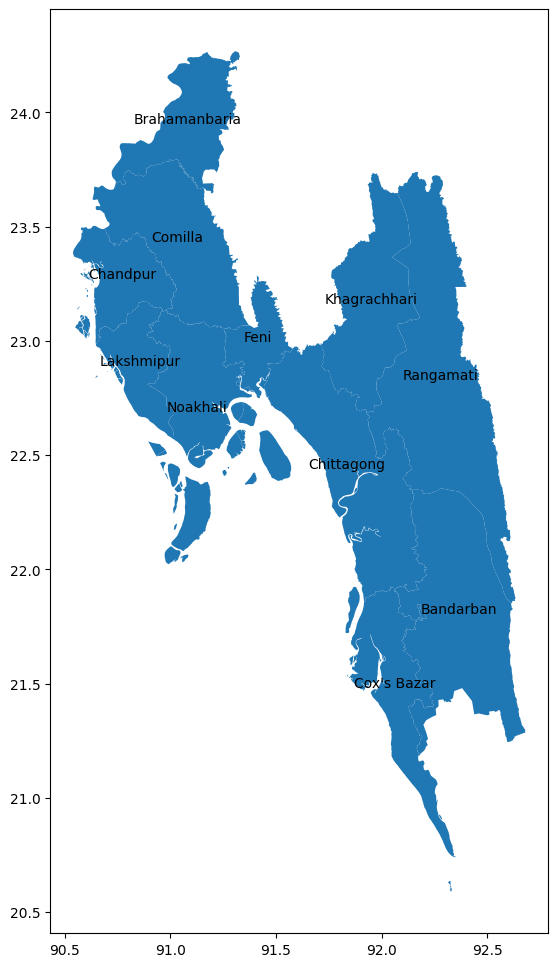

In [11]:
def labelled_chittagong_districts():
    # code from https://stackoverflow.com/questions/38899190/geopandas-label-polygons
    gd = load_gd('dis')
    gd_chit = gd[gd['div'] == 'Chittagong']
    gd_chit.info()

    ax = gd_chit.plot(figsize=(12,12))

    gd_chit.apply(
        lambda x: ax.annotate(
            text=x['dis'], xy=x.geometry.centroid.coords[0], ha='center'
        ), 
        axis=1
    );
    
labelled_chittagong_districts()

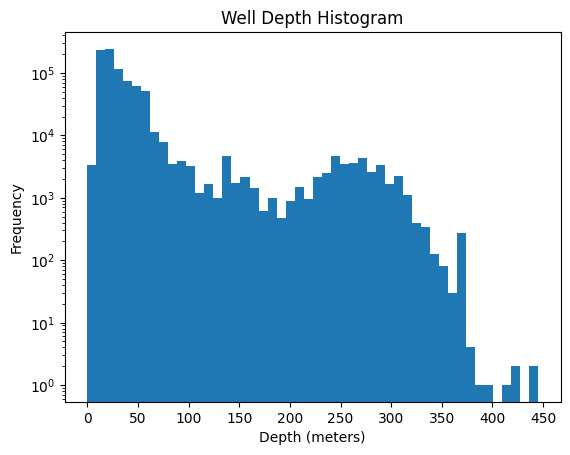

In [12]:
well_data = load_wells()
well_data['Depth'].plot(kind='hist', bins=50, log=True)
plt.xlabel('Depth (meters)')
plt.xticks(np.arange(0, 500, 50))
plt.title('Well Depth Histogram')

plt.show()

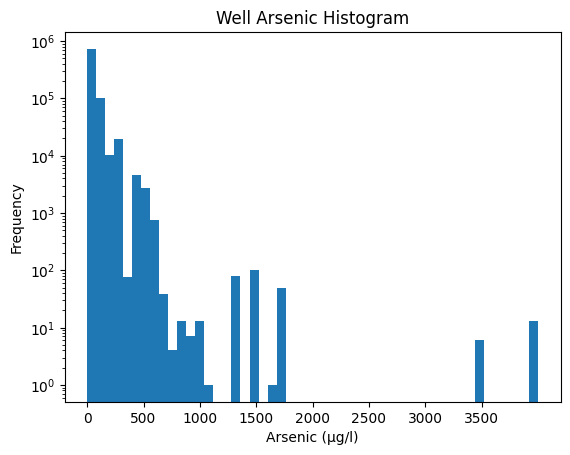

In [13]:
well_data = load_wells()
well_data['Arsenic'].plot(kind='hist', bins=50, log=True)
plt.xlabel('Arsenic (µg/l)')
plt.xticks(np.arange(0, 4000, 500))
plt.title('Well Arsenic Histogram')

plt.show()

<AxesSubplot: >

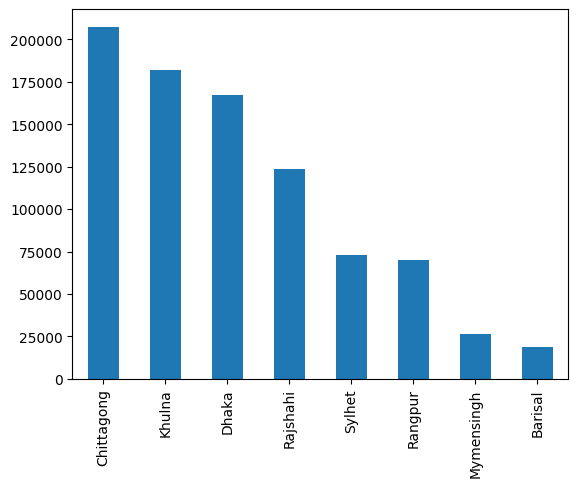

In [14]:
well_data["Division"].value_counts().plot.bar()

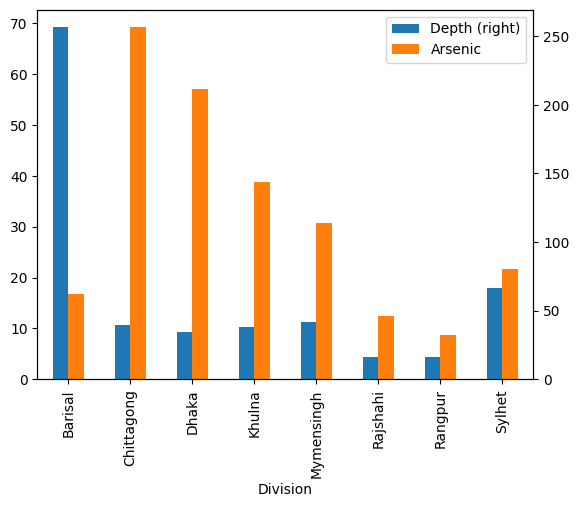

In [15]:
agg_functions = {"Depth": "mean", "Arsenic": "mean"}
div_agg_depth_as = well_data.groupby(well_data["Division"]).aggregate(agg_functions)

div_agg_depth_as.plot(kind='bar', secondary_y='Depth')
plt.show()

5      0.438349
92     0.438349
133    0.438349
257    0.438349
318    0.438349
Name: Count_Scaled, dtype: float64


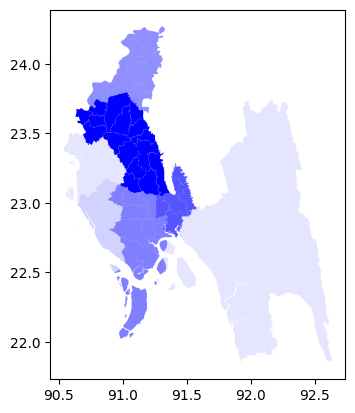

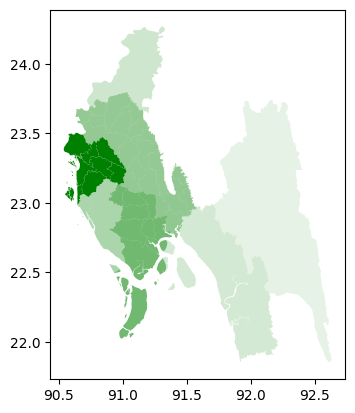

In [16]:
def chittagong_color_count():
    well_chit = well_data[well_data['Division'] == 'Chittagong']

    agg_functions = {"Depth": "mean", "Arsenic": "mean", "Depth": "count"}
    div_agg_depth_as = well_chit.groupby(well_data["District"]).aggregate(agg_functions)
    div_agg_depth_as["Count"] = well_chit.groupby(well_data["District"]).size()

    gd = load_gd('upa')
    gd_chit = gd[gd['div'] == 'Chittagong']
    
    merged = pd.merge(div_agg_depth_as, gd_chit, left_index=True, right_on="dis")
    
    gd_merged = gpd.GeoDataFrame(merged)
    
    scaler = MinMaxScaler(feature_range=(0.1, 1))
    gd_merged["Count_Scaled"] = scaler.fit_transform(gd_merged[["Count"]])
    gd_merged["Arsenic_Scaled"] = scaler.fit_transform(gd_merged[["Arsenic"]])
    
    print(gd_merged["Count_Scaled"].head())

    gd_merged.plot(color="blue", alpha=gd_merged["Count_Scaled"])
    gd_merged.plot(color="green", alpha=gd_merged["Arsenic_Scaled"])
    return
    
    # code from https://stackoverflow.com/questions/38899190/geopandas-label-polygons

    ax = merged.plot(figsize=(12,12))

    
    gd_chit.apply(
        lambda x: ax.annotate(
            text=x['dis'], xy=x.geometry.centroid.coords[0], ha='center'
        ), 
        axis=1
    );

chittagong_color_count()

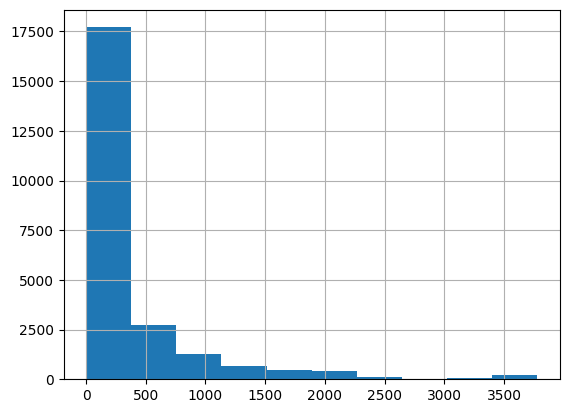

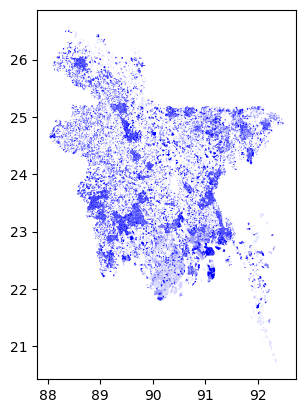

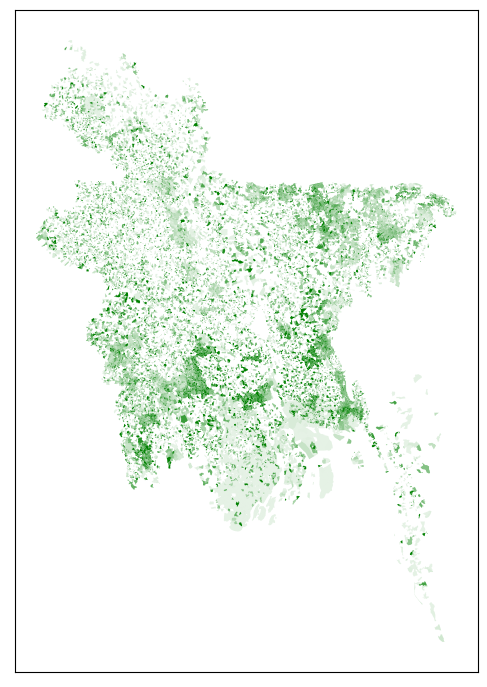

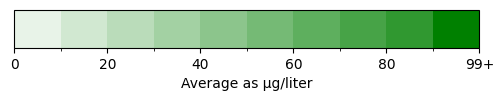

In [17]:
def level_color_count():
    agg_functions = {"Depth": "mean", "Arsenic": "mean", "Depth": "count"}

    agg_depth_as = well_data.groupby(well_data["Mouza"]).aggregate(agg_functions)

    agg_depth_as["Count"] = well_data.groupby(well_data["Mouza"]).size()

    gd = load_gd('mou')

    merged = pd.merge(agg_depth_as, gd, left_index=True, right_on="mou")

    gd_merged = gpd.GeoDataFrame(merged)

    # clip to keep color range compressed
    gd_merged["Count"].hist()
    gd_merged["Count_Clip"] = gd_merged["Count"].clip(upper=100)
    gd_merged["Arsenic_Clip"] = gd_merged["Arsenic"].clip(upper=100)

    # 0.99999 to avoid max value 1 but 1.00…02 found error
    scaler = MinMaxScaler(feature_range=(0.1, 0.99999))

    gd_merged["Count_Scaled"] = scaler.fit_transform(gd_merged[["Count_Clip"]])
    gd_merged["Arsenic_Scaled"] = scaler.fit_transform(gd_merged[["Arsenic_Clip"]])

    ax_count = gd_merged.plot(
        color="blue",
        alpha=gd_merged["Count_Scaled"],
    )

    ax_as = gd_merged.plot(
        color="green", 
        alpha=gd_merged["Arsenic_Scaled"],
        figsize=(8.6,8.6),
    )

    ax_as.axes.get_xaxis().set_visible(False)
    ax_as.axes.get_yaxis().set_visible(False)

    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)
    cmap = mpl.colors.ListedColormap([
        (0, 0.5, 0, 0.09), 
        (0, 0.5, 0, 0.18), 
        (0, 0.5, 0, 0.27), 
        (0, 0.5, 0, 0.36), 
        (0, 0.5, 0, 0.45), 
        (0, 0.5, 0, 0.54), 
        (0, 0.5, 0, 0.63), 
        (0, 0.5, 0, 0.72), 
        (0, 0.5, 0, 0.81), 
        (0, 0.5, 0, 0.9), 
        (0, 0.5, 0, 1), 
    ])
    cmap.set_over('0.25')
    cmap.set_under('0.75')

    bounds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb2 = mpl.colorbar.ColorbarBase(
        ax, 
        cmap=cmap,
        norm=norm,
        spacing='proportional',
        orientation='horizontal',
        label='Average as μg/liter',
    )
    cb2.set_ticklabels([
        '0', 
        '10', 
        '20', 
        '30', 
        '40', 
        '50',
        '60',
        '70',
        '80',
        '90',
        '99+',
    ])

level_color_count()

KeyError: 'Arsenic'

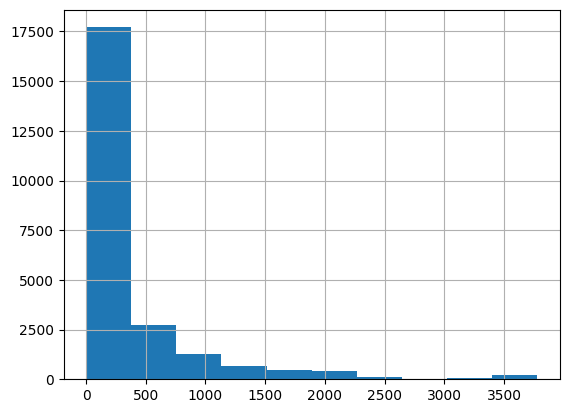

In [18]:
def data_points_per_area():
    agg_functions = {"Depth": "count"}
    agg_depth_as = well_data.groupby(well_data["Mouza"]).aggregate(agg_functions)
    agg_depth_as["Count"] = well_data.groupby(well_data["Mouza"]).size()
    gd = load_gd('mou')
    
    merged = pd.merge(agg_depth_as, gd, left_index=True, right_on="mou")
    
    gd_merged = gpd.GeoDataFrame(merged)    
    
    # clip to keep color range compressed
    gd_merged["Count"].hist()
    gd_merged["Count_Clip"] = gd_merged["Count"].clip(upper=100)
    gd_merged["Arsenic_Clip"] = gd_merged["Arsenic"].clip(upper=100)
    
    # 0.99999 to avoid max value 1 but 1.00…02 found error
    scaler = MinMaxScaler(feature_range=(0.1, 0.99999))
    
    gd_merged["Count_Scaled"] = scaler.fit_transform(gd_merged[["Count_Clip"]])

    ax_count = gd_merged.plot(
        color="blue",
        alpha=gd_merged["Count_Scaled"],
        figsize=(8.6,8.6),
    )
    
    fig, ax = plt.subplots(figsize=(6, 1))
    fig.subplots_adjust(bottom=0.5)

    cmap = mpl.colors.ListedColormap([
        (0, 0.5, 0, 0.09), 
        (0, 0.5, 0, 0.18), 
        (0, 0.5, 0, 0.27), 
        (0, 0.5, 0, 0.36), 
        (0, 0.5, 0, 0.45), 
        (0, 0.5, 0, 0.54), 
        (0, 0.5, 0, 0.63), 
        (0, 0.5, 0, 0.72), 
        (0, 0.5, 0, 0.81), 
        (0, 0.5, 0, 0.9), 
        (0, 0.5, 0, 1), 
    ])
    cmap.set_over('0.25')
    cmap.set_under('0.75')

    bounds = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    cb2 = mpl.colorbar.ColorbarBase(
        ax, 
        cmap=cmap,
        norm=norm,
        spacing='proportional',
        orientation='horizontal',
        label='Average as μg/liter',
    )
    cb2.set_ticklabels([
        '0', 
        '10', 
        '20', 
        '30', 
        '40', 
        '50',
        '60',
        '70',
        '80',
        '90',
        '99+',
    ])

data_points_per_area()

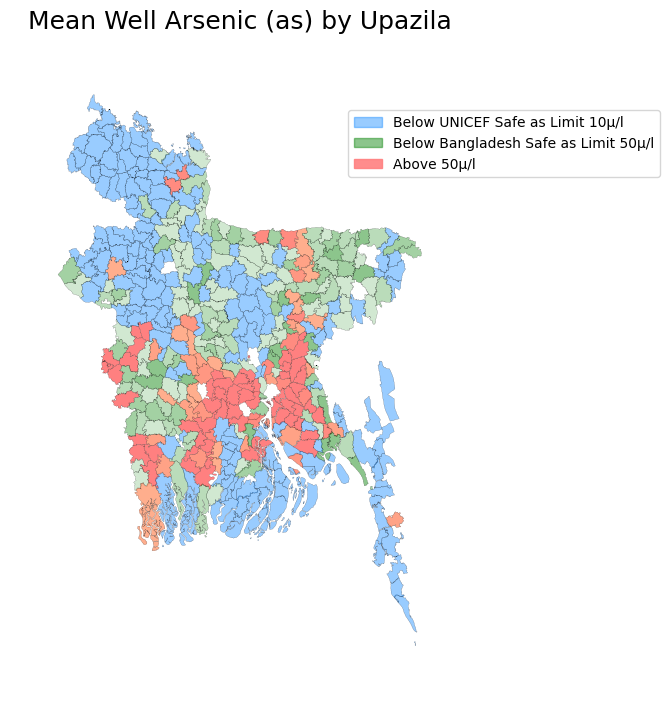

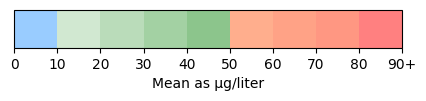

In [19]:
def mean_as_per_upa():
    agg_functions = {"Arsenic": "mean"}
    agg_depth_as = well_data.groupby(well_data["Upazila"]).aggregate(agg_functions)
    agg_depth_as["Count"] = well_data.groupby(well_data["Upazila"]).size()

    gd = load_gd('upa')

    merged = pd.merge(agg_depth_as, gd, left_index=True, right_on="upa")
    gd_merged = gpd.GeoDataFrame(merged)

    # clip to keep color range compressed
    gd_merged["Arsenic_Clip"] = gd_merged["Arsenic"].clip(upper=100)

    # 0.99999 to avoid max value 1 but 1.00…02 found error
    scaler = MinMaxScaler(feature_range=(0.0, 0.99999))

    gd_merged["Arsenic_Scaled"] = scaler.fit_transform(gd_merged[["Arsenic_Clip"]])
        
    colors = {
        'Below UNICEF Safe as Limit 10μ/l': (0, 0.5, 1, 0.4), 
        'Below Bangladesh Safe as Limit 50μ/l': (0, 0.5, 0, 0.45),
        'Above 50μ/l': (1, 0.5, 0.5, 0.9),
    }         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]

    cmap = mpl.colors.ListedColormap([
        (0, 0.5, 1, 0.4), 
        (0, 0.5, 0, 0.18), 
        (0, 0.5, 0, 0.27), 
        (0, 0.5, 0, 0.36), 
        (0, 0.5, 0, 0.45), 
        (1, 0.5, 0.3, 0.64), 
        (1, 0.5, 0.35, 0.73), 
        (1, 0.5, 0.4, 0.82), 
        (1, 0.5, 0.45, 0.91), 
        (1, 0.5, 0.5, 1), 
    ])
    
    ax = gplt.choropleth(
        gd_merged,
        projection=gcrs.AlbersEqualArea(), 
        hue='Arsenic_Scaled',
        cmap=cmap, 
        figsize=(8.6,8.6),
        linewidth=0.1,
        edgecolor='black',
    )

    ax.legend(handles, labels, bbox_to_anchor=(1.43, 0.9))
    ax.set_title('Mean Well Arsenic (as) by Upazila', fontsize=18)

    fig, ax = plt.subplots(figsize=(5, 1))
    fig.subplots_adjust(bottom=0.5)

    bounds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    cb2 = mpl.colorbar.ColorbarBase(
        ax, 
        cmap=cmap,
        norm=norm,
        spacing='proportional',
        orientation='horizontal',
        label='Mean as μg/liter',
    )
    
    as_ticklabels = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90+']
    cb2.set_ticklabels(
        as_ticklabels
    )

mean_as_per_upa()

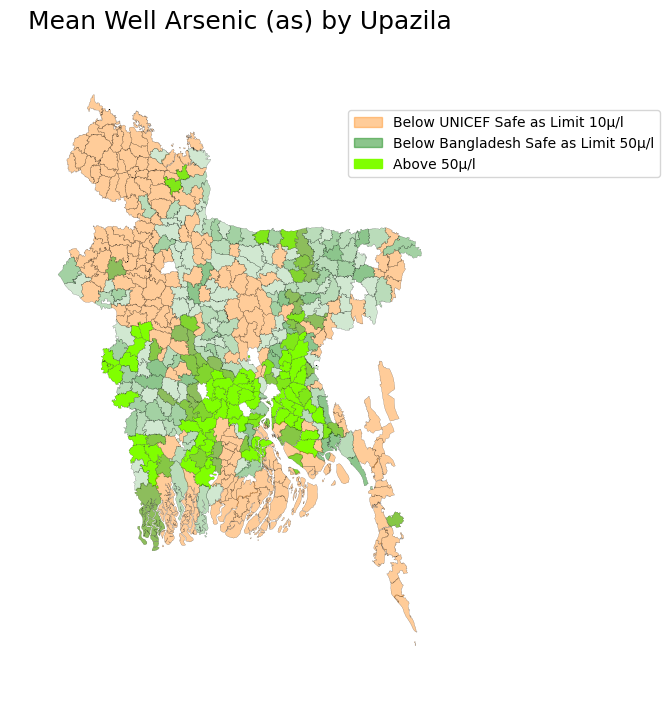

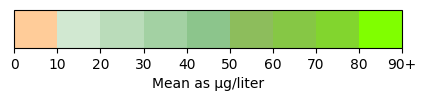

In [24]:
def mean_as_per_upa():
    well_data = load_wells()
    agg_functions = {"Arsenic": "mean"}
    agg_depth_as = well_data.groupby(well_data["Upazila"]).aggregate(agg_functions)
    agg_depth_as["Count"] = well_data.groupby(well_data["Upazila"]).size()

    gd = load_gd('upa')

    merged = pd.merge(agg_depth_as, gd, left_index=True, right_on="upa")
    gd_merged = gpd.GeoDataFrame(merged)

    # clip to keep color range compressed
    gd_merged["Arsenic_Clip"] = gd_merged["Arsenic"].clip(upper=100)

    # 0.99999 to avoid max value 1 but 1.00…02 found error
    scaler = MinMaxScaler(feature_range=(0.0, 0.99999))

    gd_merged["Arsenic_Scaled"] = scaler.fit_transform(gd_merged[["Arsenic_Clip"]])
        
    colors = {
        'Below UNICEF Safe as Limit 10μ/l': (1, 0.5, 0, 0.4), 
        'Below Bangladesh Safe as Limit 50μ/l': (0, 0.5, 0, 0.45),
        'Above 50μ/l': (0.5, 1, 0, 1),
    }         
    labels = list(colors.keys())
    handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]

    cmap = mpl.colors.ListedColormap([
        (1, 0.5, 0, 0.4), 
        (0, 0.5, 0, 0.18), 
        (0, 0.5, 0, 0.27), 
        (0, 0.5, 0, 0.36), 
        (0, 0.5, 0, 0.45), 
        (0.3, 0.6, 0, 0.64), 
        (0.35, 0.7, 0, 0.73), 
        (0.4, 0.8, 0, 0.82), 
        (0.45, 0.9, 0, 0.91), 
        (0.5, 1, 0, 1), 
    ])
    
    ax = gplt.choropleth(
        gd_merged,
        projection=gcrs.AlbersEqualArea(), 
        hue='Arsenic_Scaled',
        cmap=cmap, 
        figsize=(8.6,8.6),
        linewidth=0.1,
        edgecolor='black',
    )

    ax.legend(handles, labels, bbox_to_anchor=(1.43, 0.9))
    ax.set_title('Mean Well Arsenic (as) by Upazila', fontsize=18)

    fig, ax = plt.subplots(figsize=(5, 1))
    fig.subplots_adjust(bottom=0.5)

    bounds = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    
    cb2 = mpl.colorbar.ColorbarBase(
        ax, 
        cmap=cmap,
        norm=norm,
        spacing='proportional',
        orientation='horizontal',
        label='Mean as μg/liter',
    )
    
    as_ticklabels = ['0', '10', '20', '30', '40', '50', '60', '70', '80', '90+']
    cb2.set_ticklabels(
        as_ticklabels
    )


mean_as_per_upa()

In [ ]:
def datapoints_per_upa_map():
    gd = load_gd('dis')
    datapoints = well_data['District'].value_counts()

    merged = pd.merge(datapoints, gd, left_index=True, right_on="dis")
    gd_merged = gpd.GeoDataFrame(merged)

    # clip to keep color range compressed
    gd_merged["District"] = gd_merged["District"]
    
    ax = gplt.choropleth(
        gd_merged,
        projection=gcrs.AlbersEqualArea(), 
        hue='District',
        cmap='Blues', 
        figsize=(8.6,8.6),
        linewidth=0.1,
        edgecolor='black',
        legend=True
    )
    
    ax.set_title('Well Datapoints by District', fontsize=20)

datapoints_per_upa_map()

In [ ]:
def datapoints_per_upa_bar():
    datapoints = well_data['District'].value_counts().plot.hist(bins=10)
    #plt.xticks(np.arange(0, 15000, 2000))
    #plt.yscale('log')
    plt.title('Frequency by number of datapoints per District')
    plt.minorticks_on()

datapoints_per_upa_bar()

In [ ]:
def mean_as_per_upa():
    agg_functions = {"Depth": "mean"}
    agg_depth_as = well_data.groupby(well_data["Upazila"]).aggregate(agg_functions)
    agg_depth_as["Count"] = well_data.groupby(well_data["Upazila"]).size()

    gd = load_gd('upa')

    merged = pd.merge(agg_depth_as, gd, left_index=True, right_on="upa")
    gd_merged = gpd.GeoDataFrame(merged)
    
    ax = gplt.choropleth(
        gd_merged,
        projection=gcrs.AlbersEqualArea(), 
        hue='Depth',
        cmap='Blues', 
        figsize=(8.6,8.6),
        linewidth=0.1,
        edgecolor='black',
        legend=True
    )

    ax.set_title('Mean well depth by Upazila', fontsize=18)

mean_as_per_upa()

In [ ]:
def compare_pmouth():
    
    gdf = gpd.read_file(pmouth)
    gdf.info()
    
    ax = gplt.polyplot(
        gdf, 
        projection=gcrs.AlbersEqualArea(), 
        edgecolor='black', 
        linewidth=1,
        figsize=(10,10),
    )
    ax.add_artist(ScaleBar(1))
    
    gd = load_gd('dis')
    gd = gd[gd['div'] == 'Dhaka']

    ax2 = gplt.polyplot(
        gd,
        projection=gcrs.AlbersEqualArea(), 
        edgecolor='black', 
        linewidth=1,
        figsize=(10,10),
    )
    ax2.add_artist(ScaleBar(1))
    
    
compare_pmouth()

In [ ]:
def labelled_pmouth_map():
    # code from https://stackoverflow.com/questions/38899190/geopandas-label-polygons
    gd = gpd.read_file(pmouth)
    print(gd.info())
    print(gd['PCON13CD'].area)

    ax = gd.plot(
        figsize=(10,10),
        linewidth=1,
        edgecolor='black', 
        facecolor='white',
    )

    gd.apply(
        lambda x: ax.annotate(
            text=f"\n\n{x['PCON13NM']}", xy=x.geometry.centroid.coords[0], ha='center'
        ), 
        axis=1
    );
    
    # code from https://stackoverflow.com/questions/70256031/how-do-you-display-the-scale-in-meters-the-north-arrow-and-the-axes-in-latitude
    A=[-88*np.pi/180.,21*np.pi/180.] #Latitude of interest here 40.7 deg, longitude -74.5
    B=[-89*np.pi/180.,21*np.pi/180.] ##Latitude of interest here 40.7 deg, longitude -74.5+1
    dx=(6371000)*haversine_distances([A,B])[0,1]
    ax.add_artist(ScaleBar(dx=dx,units="m")) 
    
    plt.xlabel('longitude', fontsize=16)
    plt.ylabel('latitude', fontsize=16)

labelled_pmouth_map()